# Задание 1. Первичный анализ данных c Pandas
В этом заданиии мы будем использовать данные SOCR по росту и весу 25 тысяч подростков.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./data/weights_heights.csv', index_col='Index')

In [4]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


[2]. Посмотрите на первые 5 записей с помощью метода head Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода plot Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B11732860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021B117EB278>]], dtype=object)

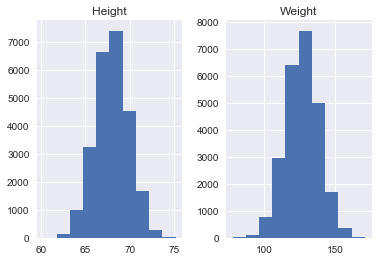

In [5]:
data.hist()

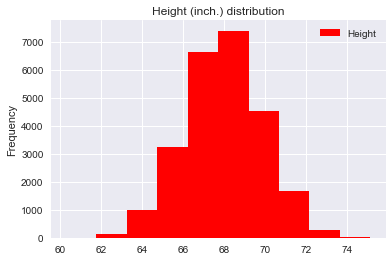

In [6]:
data.plot(y='Height', kind='hist', color='red', 
          title='Height (inch.) distribution')

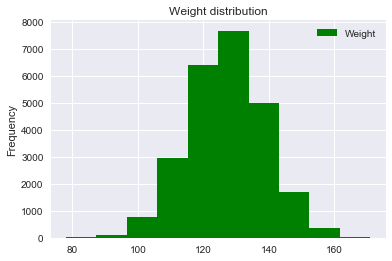

In [7]:
data.plot(y='Weight', kind='hist', color='green', 
          title='Weight distribution')

[3]. Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод pairplot библиотеки Seaborn.

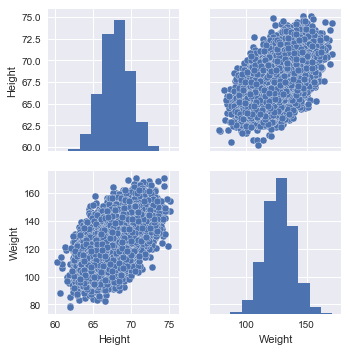

In [8]:
sns.pairplot(data=data)

In [9]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [10]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

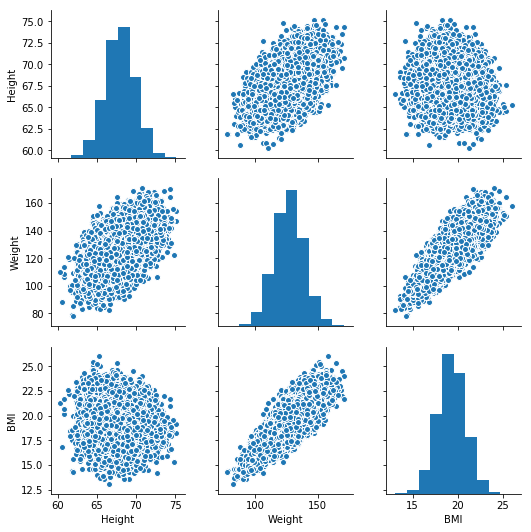

In [14]:
sns.pairplot(data=data)

[4]. Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

In [11]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
data.head()

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


[5]. Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

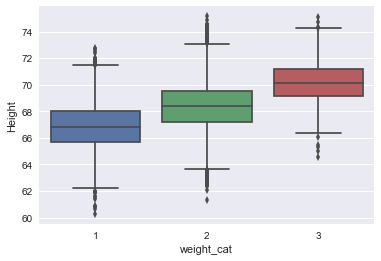

In [12]:
sns.boxplot(x='weight_cat', y='Height', data=data)

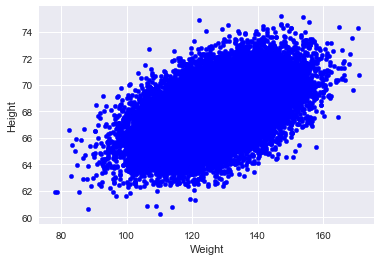

In [13]:
data.plot(x='Weight', y='Height', kind='scatter', color='blue')

[6]. Напишите функцию, которая по двум параметрам 
w
0
w0
и 
w
1
w1
вычисляет квадратичную ошибку приближения зависимости роста 
y
y
от веса 
x
x
прямой линией 
y=
w
0
+
w
1
∗x
y=w0+w1∗x
:

In [14]:
def error(w_1, w_0, data):
    summa = 0.0
    for _, row in data.iterrows():
        summa += (row['Height'] - (w_0 + w_1 * row['Weight'])) ** 2
    return summa
    

[7]. Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров (
w
0
,
w
1
)=(60,0.05)
w0,w1)=(60,0.05)
 и (
w
0
,
w
1
)=(50,0.16)
w0,w1)=(50,0.16)
. Используйте метод plot из matplotlib.pyplot, а также метод linspace библиотеки NumPy. Подпишите оси и график.

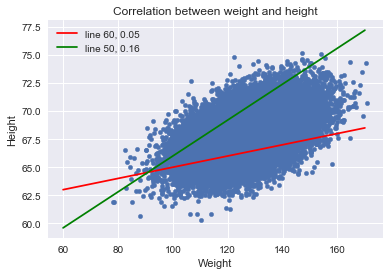

In [15]:
def y1(x):
    return 60 + 0.05 * x

def y2(x):
    return 50 + 0.16 * x

x = np.linspace(60, 170)
data.plot(x='Weight', y='Height', kind='scatter', title='Correlation between weight and height')
plt.plot(x, y1(x), color='red')
plt.plot(x, y2(x), color='green')
plt.legend(('line 60, 0.05', 'line 50, 0.16'))

[8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра 
w
1
w1
при 
w
0
w0
= 50. Подпишите оси и график.

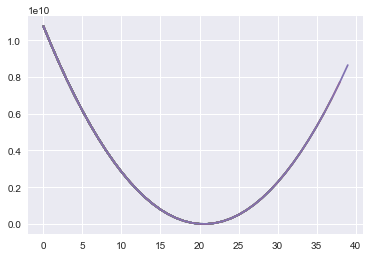

In [16]:
w_0 = 50
error_graph = []
for w_1 in np.arange(-5.0, 5.0, 0.25):
    error_graph.append(error(w_1, w_0, data))
    plt.plot(error_graph)

[9]. С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра 
w
1
w1
в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров (
w
0
w0
, 
w
1
w1
) = (50, 
w
1
_opt
w1_opt
), где 
w
1
_opt
w1_opt
– найденное в п. 8 оптимальное значение параметра 
w
1
w1
.

In [17]:
import scipy.optimize
from scipy.optimize import minimize_scalar

w_0 = 50
w_1_opt = minimize_scalar(error, bounds=(-5, 5), args=(w_0, data))
print (w_1_opt)

     fun: 79512.217286994855
    nfev: 6
     nit: 5
 success: True
       x: 0.14109203728834385


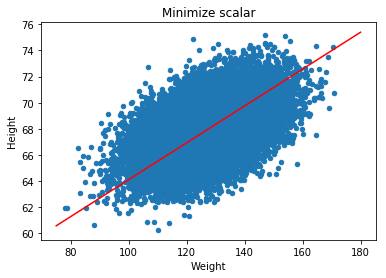

In [28]:
def y(x):
    return 50 + w_1_opt.x * x

x = np.linspace(75, 180)
data.plot(x='Weight', y='Height', kind='scatter', title='Minimize scalar')
plt.plot(x, y(x), color='red')

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме.
Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции 
z(x,y)=sin(
x
2
+
y
2
−
−
−
−
−
−
√
)
z(x,y)=sin(x2+y2)
для значений 
x
x
и 
y
y
из интервала [-5,5] c шагом 0.25.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

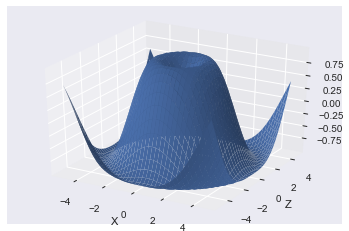

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylabel('Z')
plt.show()

[10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров 
w
0
w0
и 
w
1
w1
. Подпишите ось 
x
x
меткой «Intercept», ось 
y
y
– меткой «Slope», a ось 
z
z
– меткой «Error».

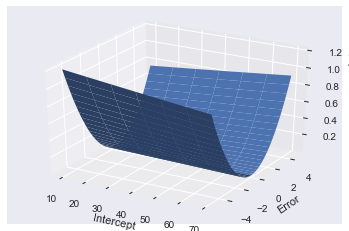

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')

w_0 = np.arange(10, 80, 10) 
w_1 = np.arange(-5, 5, 0.25)
w_0, w_1 = np.meshgrid(w_0, w_1)
Z = error(w_1, w_0, data)

surf = ax.plot_surface(w_0, w_1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_ylabel('Error')
plt.show()

[11]. С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра 
w
0
w0
в диапазоне [-100,100] и 
w
1
w1
- в диапазоне [-5, 5]. Начальная точка – (
w
0
w0
, 
w
1
w1
) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров 
w
0
w0
и 
w
1
w1
. Подпишите оси и график.

In [21]:
from scipy.optimize import minimize

def yyy(w):
    return error(w[1], w[0], data)

w_opt = minimize(yyy, [0.0, 0.0], method='L-BFGS-B', bounds=([-100, 100], [-5, 5]))
print(w_opt)

      fun: 67545.287085285861
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00291038,  0.17462298])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([ 57.57171521,   0.08200697])


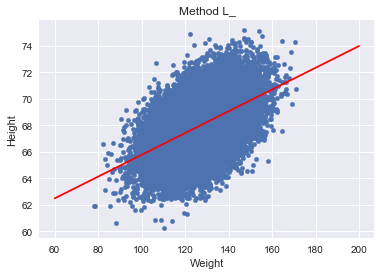

In [22]:
w0_opt = w_opt.x[0]
w1_opt = w_opt.x[1]

def y(x):
    return w0_opt + w1_opt * x

x = np.linspace(60, 200)
data.plot(x='Weight', y='Height', kind='scatter', title='Method L_')
plt.plot(x, y(x), color='red')